In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv('reduced_data.csv')
x= df.drop(['target'],axis=1)
y= df['target']

In [4]:
# Split the resampled and PCA-transformed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# Train a logistic regression model on the resampled and PCA-transformed training set
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Evaluate themodel on the testing set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66      4889
           1       0.67      0.71      0.69      4977

    accuracy                           0.68      9866
   macro avg       0.68      0.68      0.68      9866
weighted avg       0.68      0.68      0.68      9866



In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Evaluate the model on the testing set and get the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.676870058787756


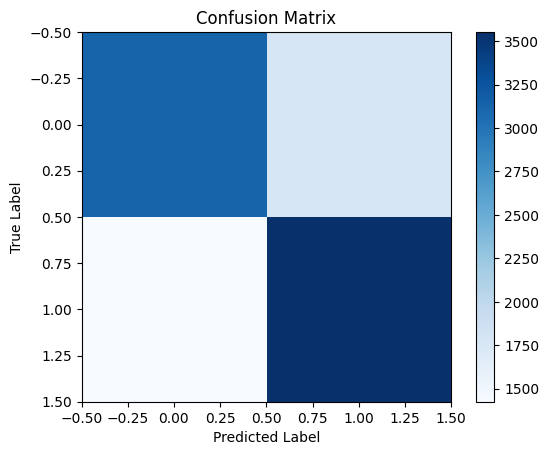

In [6]:
# Draw a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

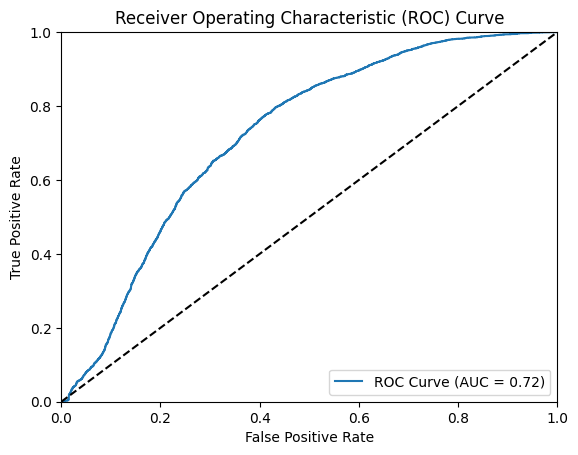

In [7]:
# Plot an ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[0.6356983579971619, 0.6410500709507398, 0.6429393229218683, 0.6405475553872348, 0.6430743918276675, 0.6425507140268749, 0.6423344500508024, 0.6406015161134706, 0.6434968627111766]


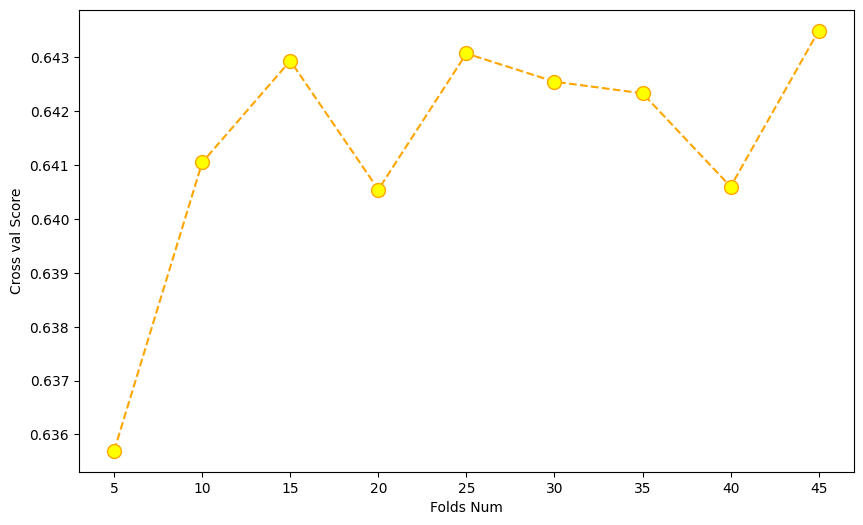

In [8]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt 

def k_folds_cross_val(folds_num,classifier,X, Y):

    sk_folds = StratifiedKFold(n_splits = folds_num)
    scores = cross_val_score(classifier, X ,Y, cv = sk_folds)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def LeaveOneOut_cross_val(classifier,X, Y):
    
    loo = LeaveOneOut()

    scores = cross_val_score(classifier,X, Y, cv = loo)

    # print("Cross Validation Scores: ", scores)
    # print("Average CV Score: ", scores.mean())
    # print("Number of CV Scores used in Average: ", len(scores))

    return scores

def cross_val(classifier,X, Y):
    
    scores=[]
    for folds_num in range (5,50,5):
      K_scores= k_folds_cross_val(folds_num,classifier,X, Y)
      scores.append(K_scores.mean())
    print(scores)
    plt.figure(figsize=(10, 6))
    plt.plot(range (5,50,5), scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
    plt.xlabel('Folds Num')
    plt.ylabel('Cross val Score')

    # LeaveOneOut_scores=LeaveOneOut_cross_val(classifier,X, Y)
    # plt.figure(figsize=(10, 6))
    # plt.plot(range(len(LeaveOneOut_scores)), LeaveOneOut_scores, color='orange', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)

cross_val(model,x, y )

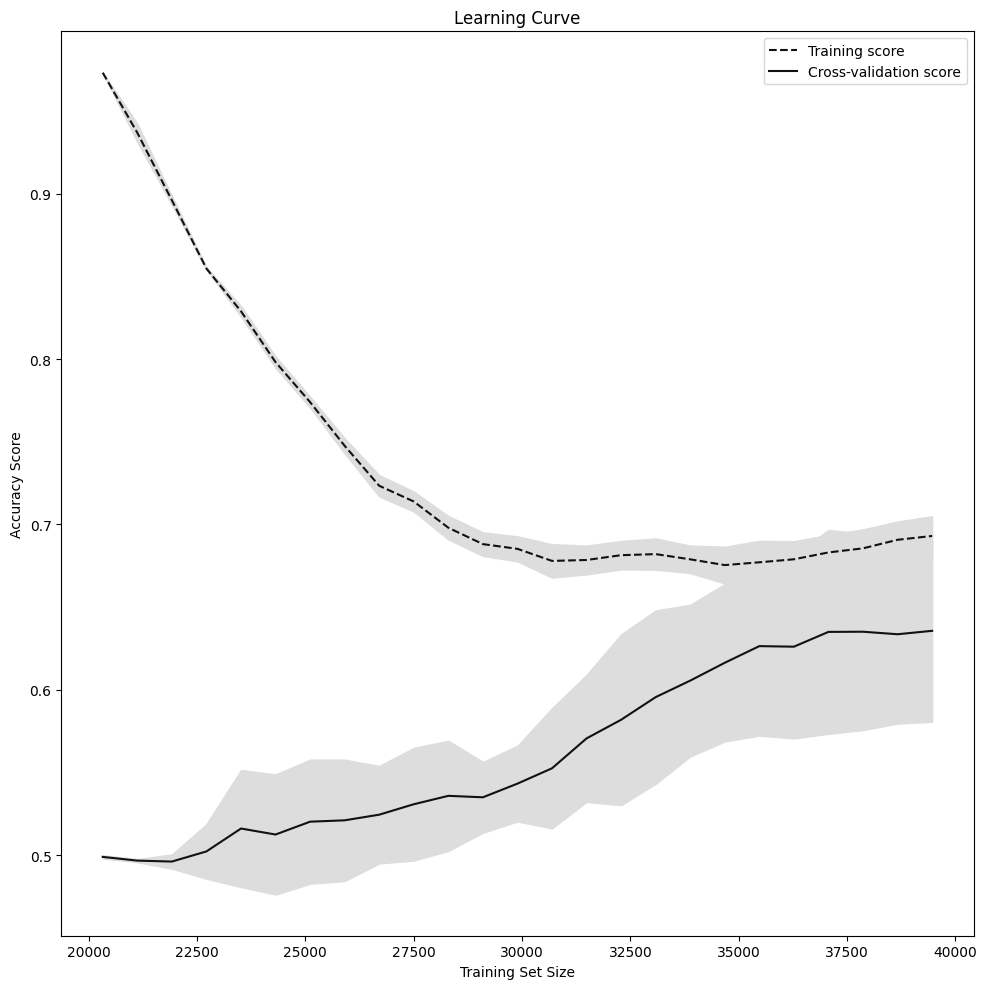

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
def PlotlearningCurve(classifier,x,y):
    #  Learning Curve and Scores
    train_sizes, train_scores, test_scores = learning_curve(classifier,x,y, cv=5, scoring='accuracy'
                                                                , n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    # Ploting the Learning Curve
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

PlotlearningCurve(model,x, y)